Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
# The code was removed by Watson Studio for sharing.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = df_data_4.iloc[:,-1].values
y = df_data_4.iloc[:, :-1].values

Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Training Simple Linear Regression model on train set

In [5]:
from sklearn.linear_model import LinearRegression
Linear_Regressor = LinearRegression() #Creates model
Linear_Regressor.fit(X_train.reshape(-1, 1) , y_train) # reshape the X_train array into 2D

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predict for test set

In [6]:
y_pred = Linear_Regressor.predict(X_test.reshape(-1, 1)) #reshape X-test array into 2D
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#printing original and predicited values side by side

[[ 4.29120222  5.1       ]
 [ 7.09648862  6.        ]
 [ 8.97549077  9.6       ]
 [ 9.90388569 10.5       ]
 [ 9.41109363  9.5       ]
 [ 7.53199096  7.1       ]]


Visualization of training set 

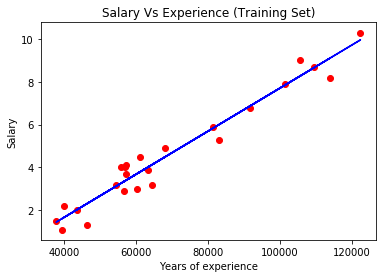

In [7]:
plt.scatter(X_train , y_train , color='red') # plot point in trainset for 
plt.plot(X_train , Linear_Regressor.predict(X_train.reshape(-1, 1)) , color='blue') #plot predicted point set for training set
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show() #Show graph

Visuallization of test set

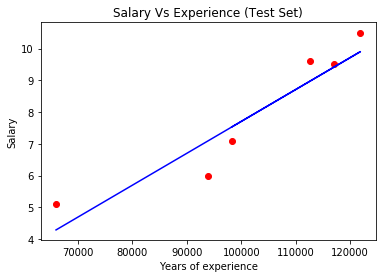

In [8]:
plt.scatter(X_test , y_test , color='red')
plt.plot(X_test , y_pred , color='blue') #same line as previous traing set line
plt.title('Salary Vs Experience (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show() #Show graph

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_credentials={
   "apikey": "D-YLGW5PVap6G-Rmv2Us9RGnLEB4N7LmYNvFMJ2Wc4Fq",
   "iam_apikey_description": "Auto-generated for key b7caef89-6290-44d4-bb97-539d3e64151c",
   "iam_apikey_name": "wdp-writer",
   "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
   "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/2b8912695c064f3caad60ffb9f881945::serviceid:ServiceId-43fc7569-53b1-4130-a4e2-627905021ffe",
   "instance_id": "d19804a8-22b4-4bcd-a3f1-2aef706bd853",
   "url": "https://jp-tok.ml.cloud.ibm.com"
}

client = WatsonMachineLearningAPIClient(wml_credentials)

metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'Salary data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Aaditya',
    client.repository.ModelMetaNames.NAME:"Simplelinear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

model_details=client.repository.store_model(Salary_Prediction,meta_props=metadata)

published_model_uid=client.repository.get_model_uid(model_details)

published_model_uid

created_deployment=client.deployments.create(published_model_uid,name="LR")

scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

client.deployments.list()